10.4 Infeasible start Newton method for LP centering problem

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt
from LPsolver import *

cvx result 159.09046244548995
Newton infeasible start result: 159.0904611156414
number of Newton steps: 7


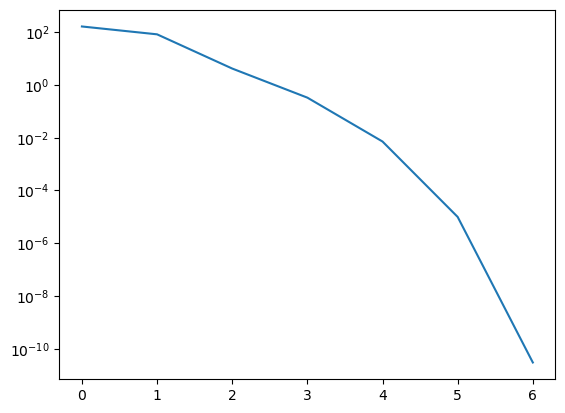

In [5]:
# random problem data
np.random.seed(364)
m = 100
n= 500
A = np.vstack((np.random.randn(m-1, n), np.ones((1, n))))
x0 = np.random.rand(n) + 0.1
b = A @ x0
c = np.random.randn(n)
# CVX result
x = cp.Variable(n, nonneg=True)
objective = cp.Minimize(c @ x - cp.sum(cp.log(x)))
constraints = [A @ x == b]
prob = cp.Problem(objective, constraints)
prob.solve()
print('cvx result', objective.value)
problem = Newton_Infeasible(A, b, c)
x_opt, _ = problem.solve()
print('Newton infeasible start result:', problem.objective()(x_opt))
print('number of Newton steps:', problem.steps)
plt.plot(problem.residue_hsitory)
plt.yscale('log')
plt.show()